# Obtención de fragmentos a partir de una semilla

<hr>

<div align="right">Marco Muñoz Pérez <br> marcomunozperez@uma.es</div>

<hr>

### Objetivos

1. Generar un fichero con *hits* en ambas secuencias.

2. Dadas dos secuencias y un tamaño de semilla, recorrer ambas secuencias con una ventana de tamaño k, 
y expandir las semillas para poder obtener el fragmento de mayor tamaño comun en ambas secuencias.

Se ha creado un programa para resolver ambos objetivos.
<hr>

### Metodología aplicada

Para implementar una solución a este problema, se han creado una serie de scripts en Python que realizan
lo siguiente:
    
    - A partir de cada una de las secuencias, generar un fichero con filas con una estructura kmer - posicion.
    De esta manera el fichero consiste en cada una de las semillas junto a la posicion en la que se encuentra.
    
    - A partir de ambos ficheros de kmers - posiciones, crear un fichero de *hits*, en el que cada fila es
    un una semilla común en ambas secuencias, seguida de pares de posiciones de esa semilla.
    
    - A partir del fichero de hits, expandir cada par de posiciones y almacenar el fragmento de mayor tamaño
    en una variable.
    
Centrandonos en este último punto, se va a detallar el método de expansión de los fragmentos apartir de una 
semilla. En primer lugar, con ambas secuencias en variables alocadas en memoria principal, se asigna una variable
con el tamaño de ventana de la k pasada como parámetro. En primer lugar se avanza la ventana en una unidad en 
abas secuencias y se comprueba si coinciden. En caso verdadero, se sumará a otra variable un peso para los 
aciertos (por defecto +1). En caso de no coincidir, se restará a esa variable un peso de fallo (por defecto -4).
El algoritmo terminará en el momento en que la suma llegue a ser negativa o cero. A continuación ocurre el mismo
proceso, en sentido inverso. Es decir, **el algoritmo se ejecuta en ambos sentidos de la semilla**.

    
Finalmente, una vez que se hayan expandido cada uno de las semillas tendremos almacenada la semilla que originó
el fragmento de mayor tamaño. Esta se vuelve a expandir, esta vez graficando el progreso para ver como se van
acumulando los *hits*.

<hr>

### Caso de prueba

##### A continuación, una ejecución con los ficheros FASTA **Myco01** y **Myco02**, con una semilla **k=10**:

In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
file1 = 'TestSequences/Myco01.fasta'
file2 = 'TestSequences/Myco02.fasta'
k = 10

Generating kmer files...(1/3)
Generating hits file...(2/3)


100%|█████████▉| 877154/877428 [02:28<00:00, 5898.35it/s]

Expanding fragments...(3/3)



100%|█████████▉| 237486/237487 [10:49<00:00, 365.72it/s]


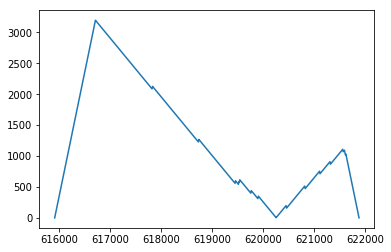

<Figure size 432x288 with 0 Axes>

In [3]:
%matplotlib inline
from main import FragmentAlign
fa = FragmentAlign(file1, file2, k)
biggest_frag = fa.get_fragemts()

Al terminar la ejecución, se muestra una gráfica del mayor fragmento en la que se puede apreciar
la posición de la semilla inicial, entre los dos máximos y como en ambas direcciones se van acumulando
los aciertos, hasta que llega a un máximo. Estos máximos indican que apartir de esa posicion, los nucleótidos
en ambas secuencias no coinciden, con lo que se van restando en cada fallo hasta llegar a cero. 

#### Mejor fragmento:

In [4]:
print(biggest_frag)

['4853', 'TTTTTTGAGG', '620253', '672737']


Siendo el primer valor la posición el tamaño total del fragmento (de máximo a máximo), seguido de la semilla,
la posición de la semilla en la sequencia 1, y en la secuencia 2.
<hr>

### Consideraciones y limites del programa

En primer lugar, indicar que la lectura de secuencias es **en memoria**. Es por esto que, para secuencias suficientemente grandes, será necesario tener en cuenta tanto la memoria asignada al entorno de ejecución
como la memoria RAM disponible.

Se ha usado la libreria [tqdm](https://github.com/tqdm/tqdm) para mostrar el progreso de la ejecución.
Cambiando el interprete usado, se puede reducir considerablemente el tiempo de ejecución. [Pypy](https://pypy.org/) es un interprete que puede ser util a estos efectos.

A continuación se va a analizar el tiempo de ejecuión, variando el tamaño de la semilla:

In [13]:
%%capture
import time
k_list = [8,10,15,20,25,30,35,40,45,50]
timing_list = list()
for k in k_list:
    time_start = time.time()
    from main import FragmentAlign
    fa = FragmentAlign(file1, file2, k)
    biggest_frag = fa.get_fragemts()
    timing_list.append(time.time()-time_start)

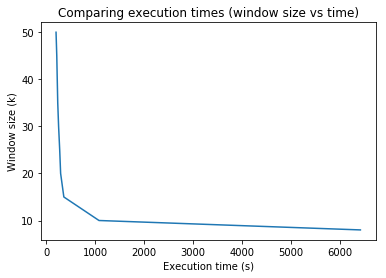

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(timing_list,k_list)
plt.title('Comparing execution times (window size vs time)')
plt.ylabel('Window size (k)')
plt.xlabel('Execution time (s)')
plt.show()

Como se puede apreciar, conforme disminuimos el tamaño de ventana, k, aumenta exponencialmente el tiempo
de ejecución. Esto ocurre porque el proceso de creación del fichero con los hits de ambas secuencias tiene
complejidad exponencial, al aumentar el número de combinaciones de hits posibles. Sin embargo, el proceso de
expandir las semillas es lineal.

El código fuente y archivos de prueba están disponibles en [BitBucket](https://bitbucket.org/mampz/tyma/src/master/).